# Model Post-Fitting: Detecting Collinearity

### by

# Jeff Gross

based on SAS e-learning

In [2]:
libname statdata "/folders/myfolders/ECST131"; 
libname library "/folders/myfolders/ECST131";

<img src="files/collin_1.png">

<img src="files/collin_2.png">

<img src="files/collin_3.png">

<img src="files/collin_4.png">

<img src="files/collin_5.png">

### VIF Cutoff: >10

<img src="files/modeling.png">

### Task: Fit a multiple logistic regression model with Unsafe as the outcome variable and Weight, Size, and Region as the predictor variables. Using the final model, chosen by backward elimination, and using the STORE statement, generate predictive probabilities for the cars in the following DATA step.

### Results: Comparing the model fit statistics, the AIC (92.629) and SC (100.322) are both smaller in the this logistic regression model fit by the backward elimination method. This indicates that the Size-only model is better than the Region-only model. Using the c statistic, you can also see improvement beyond the Region-only model, 0.818 in this model as compared with 0.598 in the previous model.


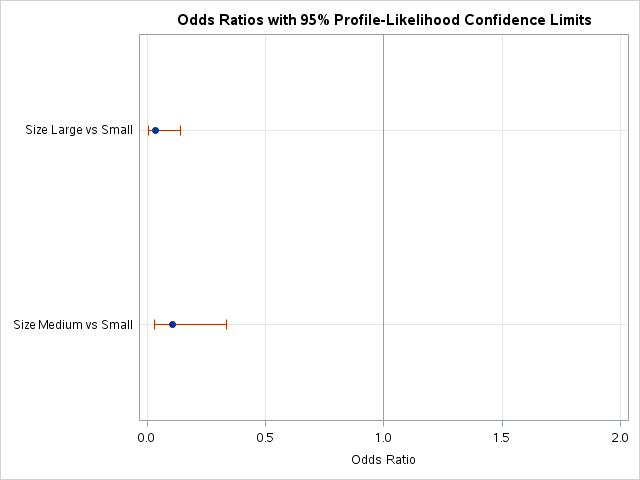
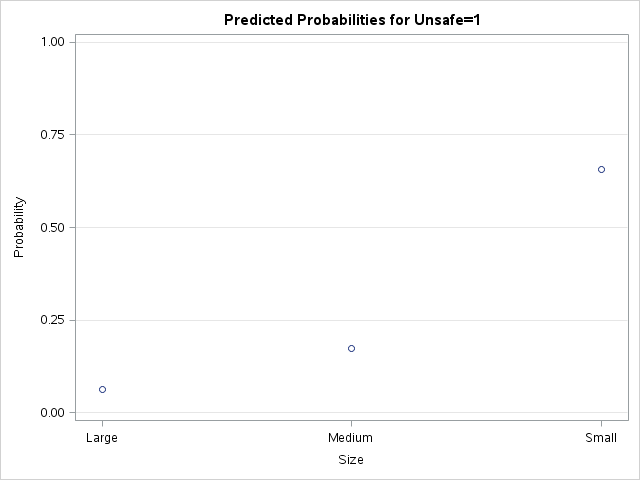

In [4]:
ods graphics on;

proc logistic data=statdata.safety plots(only)=(effect oddsratio);
   class Region (param=ref ref='Asia')
         Size (param=ref ref='Small');
   model Unsafe(event='1')=Weight Region Size / clodds=pl selection=backward;
   units weight=-1;
   store isSafe;
   format Size sizefmt.;
   title 'LOGISTIC MODEL: Backwards Elimination';
run;

title;

data checkSafety;
   length Region $9.;
	 input Weight Size Region $ 5-13;
	 datalines;
4 1 N America
3 1 Asia     
5 3 Asia     
5 2 N America
;
run;

proc plm restore=isSafe;
score data=checkSafety out=scored_cars / ILINK;
title 'Safety Predictions using PROC PLM';
run;

proc print data=scored_cars;
run;

title;